In [1]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Fies = '/content/drive/MyDrive/Thesis_Files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [5]:
# dmdt_by_Name_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50.pkl'
dmdt_by_Name_Band_file = Thesis_Fies + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'

Let's understand our distribution a little better.

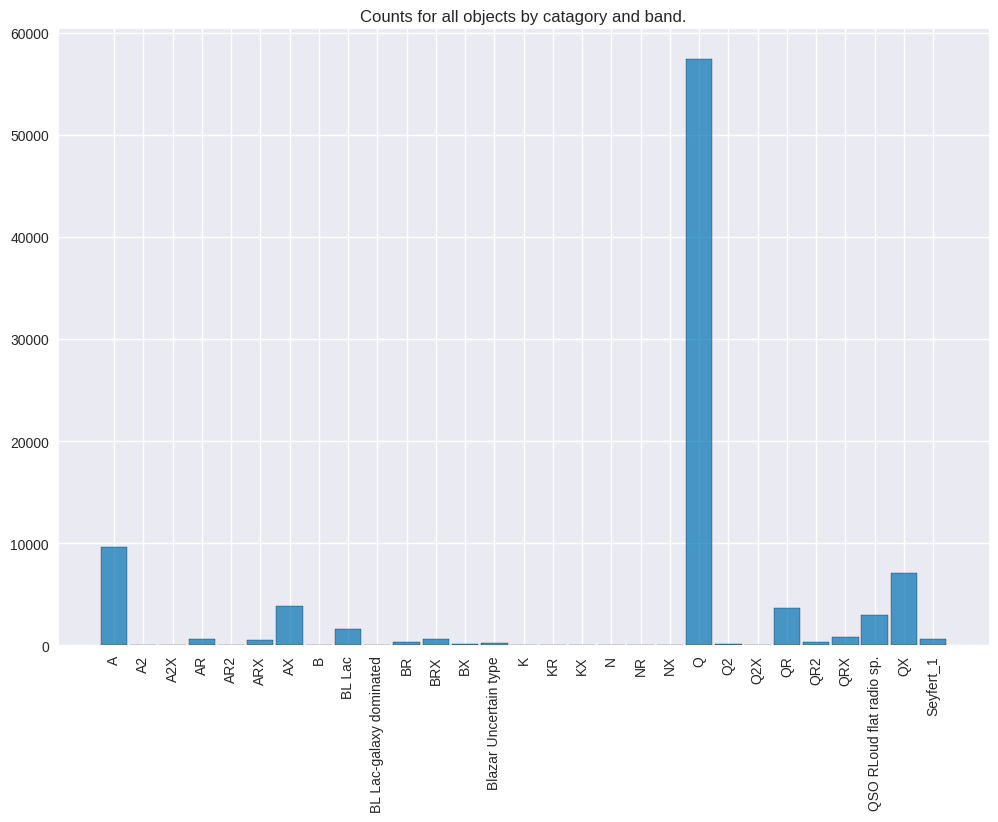

In [8]:
### plotting the distribution
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
type_array = dmdt_by_Name_Band['type'].to_numpy()

plt.figure(figsize=(12,8))

counts, bin_edges, _ = plt.hist(type_array, bins=len(set(type_array)), edgecolor='black', alpha=0.7, align='mid', rwidth=0.9)

categories = sorted(set(type_array))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.xticks(bin_centers, labels=categories, rotation=90)
plt.title('Counts for all objects by catagory and band.')

plt.show()

del type_array, counts, bin_edges, dmdt_by_Name_Band

We'll only consider the Q, QR, and QX catagories, while watching out for that large diaparity!

### RPCA with FBPCA

In [7]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Fies + 'Thesis/dmdt_Analysis/')

!pip install fbpca &> /dev/null
from fbpca_implementation import *

In [9]:
dmdt_by_Name_Band_QSOs = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band_QSOs = dmdt_by_Name_Band_QSOs[dmdt_by_Name_Band_QSOs['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band_QSOs = dmdt_by_Name_Band_QSOs.drop(columns=['n_good_det'])

Q_hists_by_name_band = dmdt_by_Name_Band_QSOs[dmdt_by_Name_Band_QSOs['type'] == 'Q']['histogram'].apply(lambda x: x / x.sum()).to_numpy()
QR_hists_by_name_band = dmdt_by_Name_Band_QSOs[dmdt_by_Name_Band_QSOs['type'] == 'QR']['histogram'].apply(lambda x: x / x.sum()).to_numpy()
QX_hists_by_name_band = dmdt_by_Name_Band_QSOs[dmdt_by_Name_Band_QSOs['type'] == 'QX']['histogram'].apply(lambda x: x / x.sum()).to_numpy()

# del dmdt_by_Name_Band_QSOs

M_Q = np.stack([arr.flatten() for arr in Q_hists_by_name_band], axis=1)
M_QR = np.stack([arr.flatten() for arr in QR_hists_by_name_band], axis=1)
M_QX = np.stack([arr.flatten() for arr in QX_hists_by_name_band], axis=1)

In [11]:
L_Q, S_Q, examples =  pcp(M_Q, maxiter=7, k=10, example_column=1000)
L_QR, S_QR, examples =  pcp(M_QR, maxiter=7, k=10, example_column=1000)
L_QX, S_QX, examples =  pcp(M_QX, maxiter=7, k=10, example_column=1000)

rank sv: 1
error:  0.09272784208140802
rank sv: 126
error:  0.010454514195229291
rank sv: 3
error:  0.00035280407461698167
rank sv: 128
error:  1.343337493957075e-05
rank sv: 4
error:  4.083403353894524e-07
rank sv: 4
error:  7.83825728313646e-09
rank sv: 4
error:  6.384368002926106e-10
rank sv: 1
error:  0.09156137994971623
rank sv: 126
error:  0.009772872241880117
rank sv: 4
error:  0.0003213692089500528
rank sv: 4
error:  1.4845358009519926e-05
rank sv: 4
error:  4.5324144178433884e-07
rank sv: 4
error:  9.304478517429517e-09
rank sv: 4
error:  6.074643802358925e-10
rank sv: 1
error:  0.09300662852795213
rank sv: 126
error:  0.010315016213732002
rank sv: 3
error:  0.0003427333905659518
rank sv: 128
error:  1.3567350352982298e-05
rank sv: 4
error:  3.535518809754369e-07
rank sv: 4
error:  5.247811830579644e-09
rank sv: 4
error:  6.490189839972324e-10


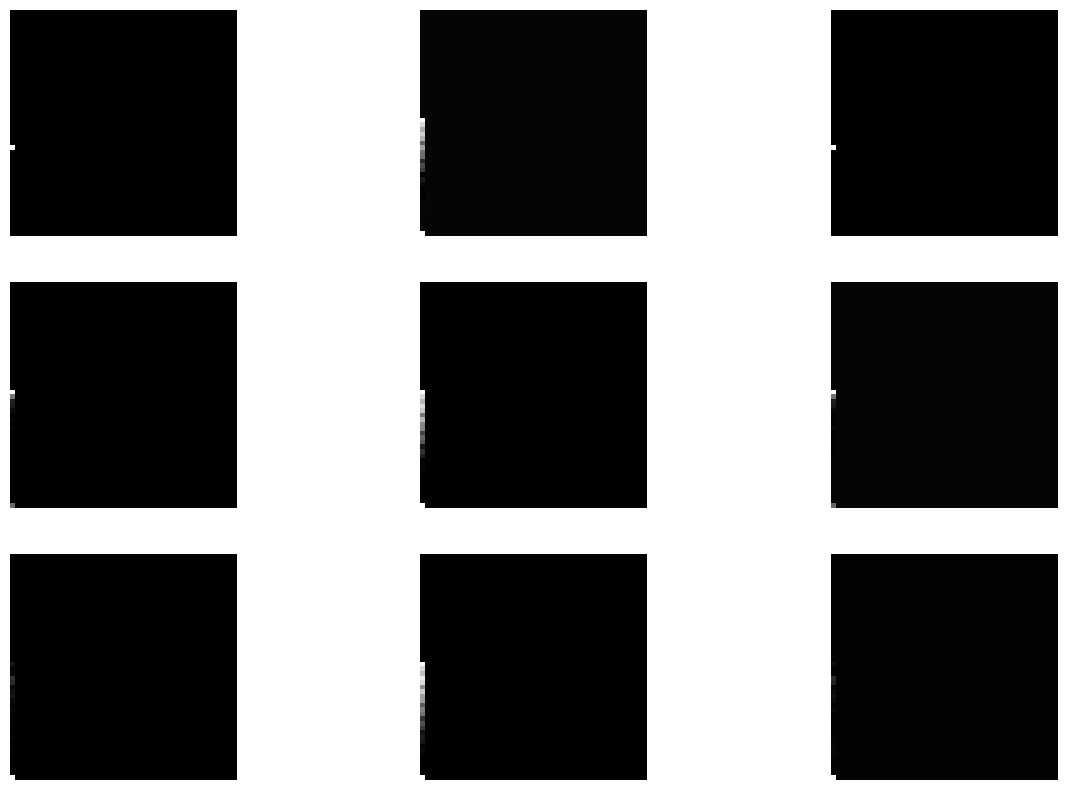

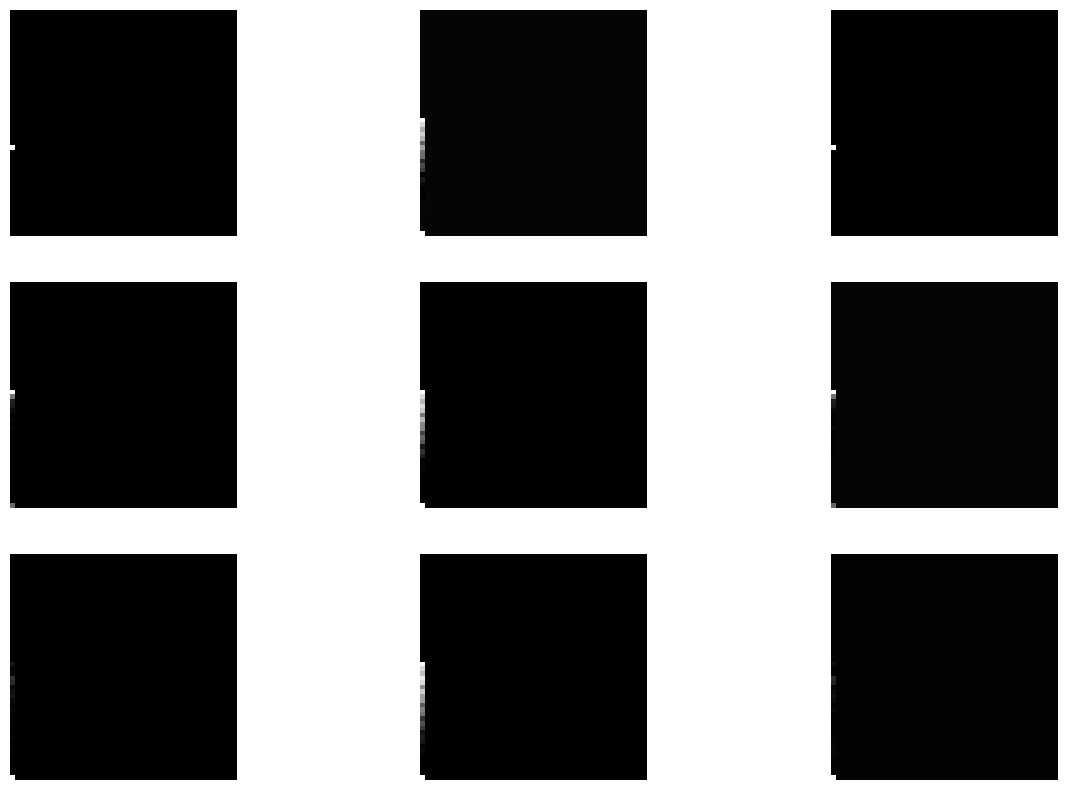

In [12]:
plt_images(M_Q, L_Q, S_Q, [45, 56, 776], (50,50))

In [ ]:
plots()

In [ ]:
for index, row in dmdt_by_Name_Band_50x50_df.iterrows():
    array = S[:, index].reshape(50, 50)
    array_normalized = (array - array.min()) / (array.max() - array.min()) * 255
    array_normalized = array_normalized.astype(np.uint8)
    image = Image.fromarray(array_normalized)

    name, obj_type, band = row['name'], row['type'], row['band']
    image.save(f'/home/shoaib/Thesis/dmdt_Analysis/Histograms/FBPCA/QSOsOnly_allbands_S_Images/{name}_{obj_type}_{band}.png')
    print(f'{index} of {len(dmdt_by_Name_Band_50x50_df)} images saved')

0 of 69895 images saved
1 of 69895 images saved
2 of 69895 images saved
3 of 69895 images saved
4 of 69895 images saved
5 of 69895 images saved
6 of 69895 images saved
7 of 69895 images saved
8 of 69895 images saved
9 of 69895 images saved
10 of 69895 images saved
11 of 69895 images saved
12 of 69895 images saved
13 of 69895 images saved
14 of 69895 images saved
15 of 69895 images saved
16 of 69895 images saved
17 of 69895 images saved
18 of 69895 images saved
19 of 69895 images saved
20 of 69895 images saved
21 of 69895 images saved
22 of 69895 images saved
23 of 69895 images saved
24 of 69895 images saved
25 of 69895 images saved
26 of 69895 images saved
27 of 69895 images saved
28 of 69895 images saved
29 of 69895 images saved
30 of 69895 images saved
31 of 69895 images saved
32 of 69895 images saved
33 of 69895 images saved
34 of 69895 images saved
35 of 69895 images saved
36 of 69895 images saved
37 of 69895 images saved
38 of 69895 images saved
39 of 69895 images saved
40 of 6989

In [ ]:
label_mapping = {'Q': 0, 'QR': 1, 'QX': 2}
dmdt_by_Name_Band_50x50_df['type_num'] = dmdt_by_Name_Band_50x50_df['type'].map(label_mapping)

In [ ]:
image_paths = [f"/home/shoaib/Thesis/dmdt_Analysis/Histograms/FBPCA/QSOsOnly_allbands_S_Images/{row['name']}_{row['type']}_{row['band']}.png" for (index, row) in dmdt_by_Name_Band_50x50_df.iterrows()]
dmdt_by_Name_Band_50x50_df['image_path'] = image_paths

In [ ]:
dmdt_by_Name_Band_50x50_df = dmdt_by_Name_Band_50x50_df.sample(frac=0.1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['image_path']
        label = self.df.iloc[idx]['type_num']
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
train_df, val_df = train_test_split(dmdt_by_Name_Band_50x50_df, test_size=0.2, stratify=dmdt_by_Name_Band_50x50_df['type_num'], random_state=42)

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Create datasets
train_dataset = CustomDataset(train_df, transform=transform)
val_dataset = CustomDataset(val_df, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MobileNetV2
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.last_channel, len(dmdt_by_Name_Band_50x50_df['type_num'].unique()))  # Adjust for number of classes
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Optional learning rate scheduler

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10):
    train_loss, val_loss = [], []
    train_acc, val_acc = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = correct / total
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)

        # Validation phase
        model.eval()
        val_running_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_epoch_loss = val_running_loss / val_total
        val_epoch_acc = val_correct / val_total
        val_loss.append(val_epoch_loss)
        val_acc.append(val_epoch_acc)

        scheduler.step()

        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
              f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

    return train_loss, val_loss, train_acc, val_acc


In [ ]:
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


Epoch 1/10: Train Loss: 0.5771, Train Acc: 0.8326, Val Loss: 0.5465, Val Acc: 0.8362
Epoch 2/10: Train Loss: 0.5597, Train Acc: 0.8362, Val Loss: 0.5382, Val Acc: 0.8362
Epoch 3/10: Train Loss: 0.5458, Train Acc: 0.8362, Val Loss: 0.5460, Val Acc: 0.8362
Epoch 4/10: Train Loss: 0.5423, Train Acc: 0.8362, Val Loss: 0.5486, Val Acc: 0.8362
Epoch 5/10: Train Loss: 0.5395, Train Acc: 0.8355, Val Loss: 0.5474, Val Acc: 0.8362
Epoch 6/10: Train Loss: 0.4945, Train Acc: 0.8373, Val Loss: 0.5447, Val Acc: 0.8340
Epoch 7/10: Train Loss: 0.4657, Train Acc: 0.8433, Val Loss: 0.5638, Val Acc: 0.8205
Epoch 8/10: Train Loss: 0.4326, Train Acc: 0.8514, Val Loss: 0.5915, Val Acc: 0.8097
Epoch 9/10: Train Loss: 0.3829, Train Acc: 0.8662, Val Loss: 0.6399, Val Acc: 0.8062


In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('image_path'),   # Column with image paths
    get_y=ColReader('type'),   # Column with image types
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split 80% train, 20% valid
    item_tfms=Resize(224),    # Resize for ResNet
)

dls = dblock.dataloaders(dmdt_by_Name_Band_50x50_df, bs=32)  # Batch size 32

In [ ]:
learn = vision_learner(dls, mobilenet_v2, metrics=accuracy, weights=MobileNet_V2_Weights.IMAGENET1K_V1)

StopIteration: 

SuggestedLRs(valley=0.009120108559727669)

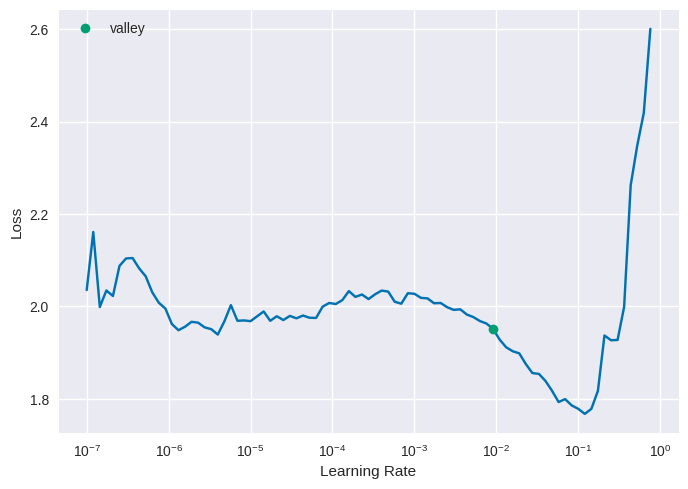

In [ ]:
learn.lr_find()

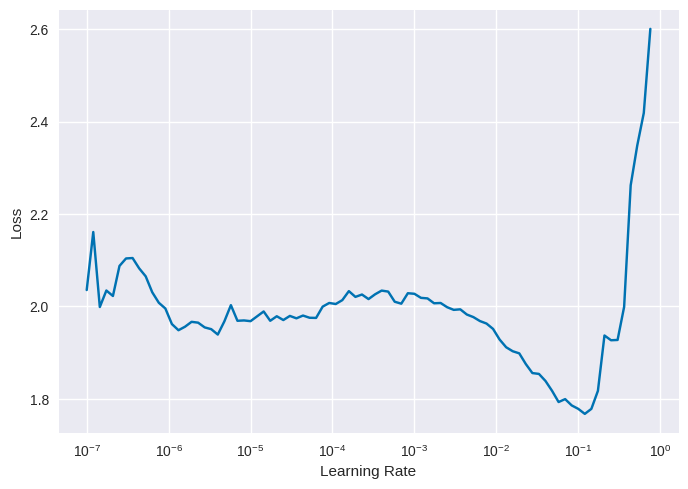

In [ ]:
learn.recorder.plot_lr_find()

In [ ]:
learn.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 

In [ ]:
# Normalize images
images = images / 255.0

# Add channel dimension for grayscale images
images = np.expand_dims(images, axis=1)  # Shape: (1000, 1, 50, 50)

# Convert to PyTorch tensors
images = torch.tensor(images, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from fastai.data.core import DataLoaders
from torch.utils.data import TensorDataset, DataLoader
import pytorch as torch

# Create datasets
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_ds = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))

# DataLoaders with FastAI
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)
dls = DataLoaders(train_dl, val_dl)

/home/shoaib/.conda/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'torch' is not defined

In [ ]:
### FastAI
from fastai.vision.all import *
import torch.nn as nn
from fastai.metrics import F1Score, accuracy, RocAuc, mae, mse

/home/shoaib/.conda/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

# Normalize images
images = images / 255.0

# Add channel dimension for grayscale images
images = np.expand_dims(images, axis=1)  # Shape: (1000, 1, 50, 50)

# Convert to PyTorch tensors
images = torch.tensor(images, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from fastai.data.core import DataLoaders
from torch.utils.data import TensorDataset, DataLoader

# Create datasets
train_ds = TensorDataset(X_train, y_train)
val_ds = TensorDataset(X_val, y_val)

# Create DataLoaders
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)

# Wrap into FastAI DataLoaders
dls = DataLoaders(train_dl, val_dl)

In [ ]:
from fastai.vision.all import *

# Define a simple CNN using FastAI's API
def create_cnn():
    return nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(64 * 12 * 12, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 4),  # Output layer for 4 categories
    )

model = create_cnn()

In [ ]:
seed = 42  # For reproducibility
root_dir = '/home/shoaib/PSChallenge/Stacking/dm_dt_type_band_diffs_by_OID/'

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('oid_alerce', pref=f'{root_dir}', suff='.png'),  # Adjust path as needed
    get_y=ColReader('type'),
    splitter=RandomSplitter(0.2, seed=seed),
    # item_tfms=[CropPad(96)],
    # batch_tfms=aug_transforms(
    #     max_zoom=1.0, flip_vert=True, max_lighting=0.0, max_warp=0.0
    # ) + [Normalize]
)

dls = ImageDataLoaders.from_dblock(dblock, all_lightcurves, path=root_dir, bs=32)

In [ ]:
S

NameError: name 'images' is not defined

In [ ]:
# Convert single-channel grayscale images to 3-channel format
images_rgb = np.repeat(images, 3, axis=1)  # Shape: (1000, 3, 50, 50)

In [ ]:
from fastai.data.core import DataLoaders
from torch.utils.data import TensorDataset, DataLoader

# Create datasets
train_ds = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
val_ds = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))

# DataLoaders with FastAI
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)
dls = DataLoaders(train_dl, val_dl)

In [ ]:
from fastai.vision.all import *

# Create the Learner with a pretrained ResNet
learn = cnn_learner(dls, resnet18, metrics=accuracy)

In [ ]:
# Find an optimal learning rate
learn.lr_find()

# Train the model
learn.fit_one_cycle(10, 1e-3)  # 10 epochs, learning rate 0.001
